In [1]:
ls

 Volume in drive C is OS
 Volume Serial Number is E4C2-09B2

 Directory of C:\Users\AKASH KARMAKAR\data science\excelr tuts\Excelr assignment code files\multi linear regression 5

28-02-2022  22:59    <DIR>          .
20-02-2022  02:40    <DIR>          ..
21-02-2022  19:19    <DIR>          .ipynb_checkpoints
28-02-2022  22:59            89,541 50 start ups solution.ipynb
20-02-2022  02:40             2,436 50_Startups.csv
20-02-2022  02:40               468 proble_statement(50_startups) (1).txt
20-02-2022  02:40             1,752 Toyota Corolla.txt
20-02-2022  02:40           224,041 ToyotaCorolla.csv
               5 File(s)        318,238 bytes
               3 Dir(s)  54,519,521,280 bytes free


In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns

In [3]:
data= pd.read_csv('50_startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


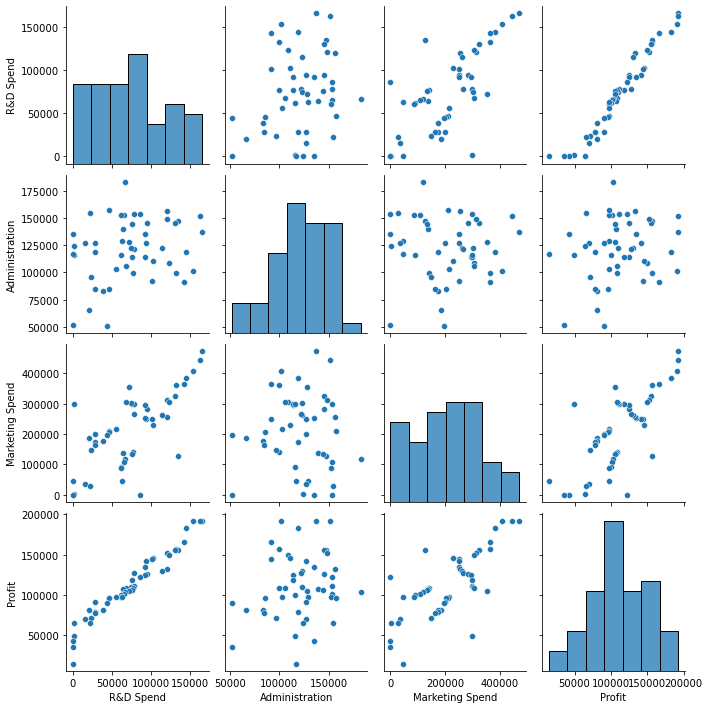

In [4]:
sns.pairplot(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
# dropping the state column as it has no effect on the profit parameter
data_cl1= data.drop(['State'], axis=1)
data_cl1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# rename

In [18]:
data_cl1.rename({'R&D Spend': 'rnd_spend'}, axis=1, inplace=True)
data_cl1.rename({'Administration': 'admin_spend'}, axis=1, inplace=True)
data_cl1.rename({'marketing_spend': 'market_spend'}, axis=1, inplace=True)
data_cl1.rename({'Profit': 'profit'}, axis=1, inplace=True)
data_cl1.head()

,rnd_spend,admin_spend,market_spend,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [20]:
model=smf.ols('profit~ rnd_spend+admin_spend+market_spend', data=data_cl1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           4.53e-30
Time:                        23:09:40   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rnd_spend        0.8057      0.045     17.846      0.000       0.715       0.897
admin_spend     -0.0268      0.051     -0.526      0.602      -0.130       0.076
market_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### as the admin_spend p value is insignificant of the dependent variable 
lets check the model without the admin_spend 

In [21]:
#without the admin_spend var
model1=smf.ols('profit~ rnd_spend+market_spend', data=data_cl1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           2.16e-31
Time:                        23:09:43   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
rnd_spend        0.7966      0.041     19.266      0.000       0.713       0.880
market_spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### here in this model without the admin spend we can see that the r square value moved closer to the adj. rsquared value 

In [36]:
#checkng the VIF for admin spend
rsq_admin_spend=smf.ols('admin_spend~rnd_spend+market_spend',data=data_cl1).fit().rsquared
vif_admin=1/(1-rsq_admin_spend)
print(f'vif of admin_spend : {vif_admin}')

rsq_market=smf.ols('market_spend~admin_spend+rnd_spend',data=data_cl1).fit().rsquared
vif_market=1/(1-rsq_market)
print(f'vif of maket_spend : {vif_market}')

rsq_rnd=smf.ols('rnd_spend~market_spend+admin_spend', data= data_cl1).fit().rsquared
vif_rnd=1/(1-rsq_rnd)
print(f'vif of rnd_spend : {vif_rnd}')




vif of admin_spend : 1.1750910070550458
vif of maket_spend : 2.3267732905308773
vif of rnd_spend : 2.4689030699947017


# check for the residuals

C:\anaconda-python\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


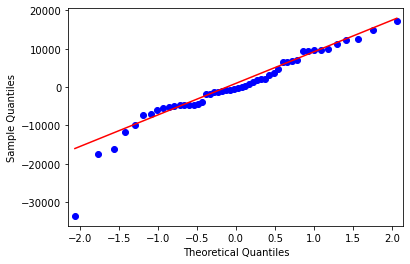

In [32]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
sm.qqplot(model1.resid, line='q')
plt.show()

# residual plot for homo scadasticity

In [33]:
def get_std_val(val):
    return ((val-val.mean())/val.std())

Text(0.5, 1.0, 'residual plot for homoscadasticity')

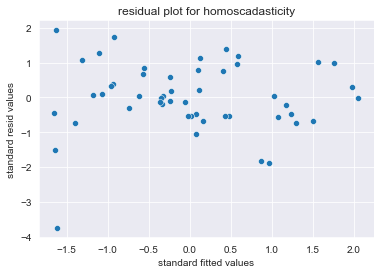

In [43]:
sns.set_style('darkgrid')
sns.scatterplot(x=get_std_val(model1.fittedvalues), y=get_std_val(model.resid), data=data_cl1 )
plt.xlabel('standard fitted values')
plt.ylabel('standard resid values')
plt.title('residual plot for homoscadasticity')

### residual regression plot check

#### for market_spend parameter

<function matplotlib.pyplot.show(close=None, block=None)>

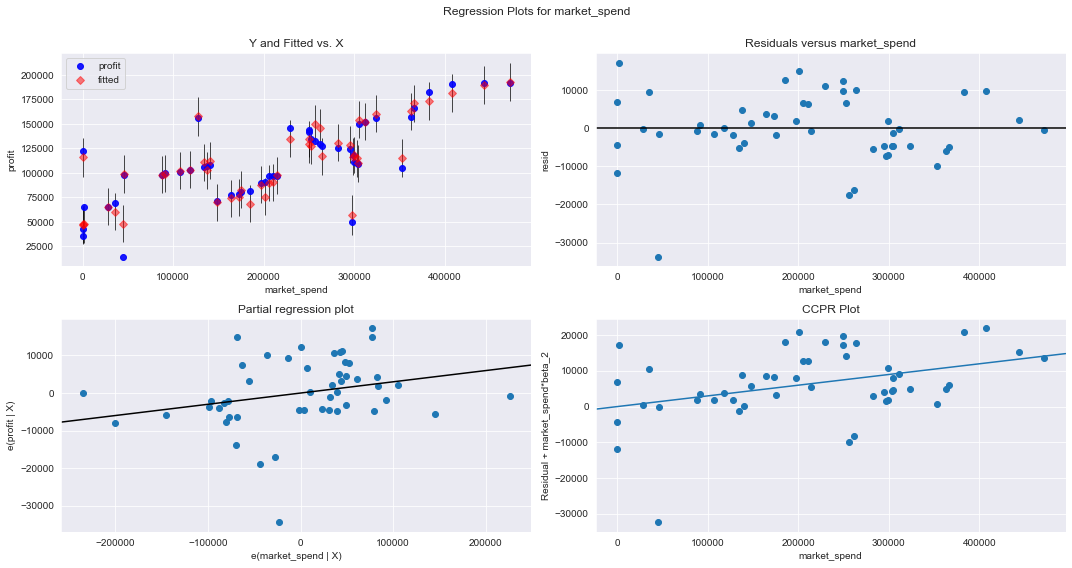

In [50]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1, 'market_spend', fig=fig)
plt.show

#### for rnd_spend parameter

<function matplotlib.pyplot.show(close=None, block=None)>

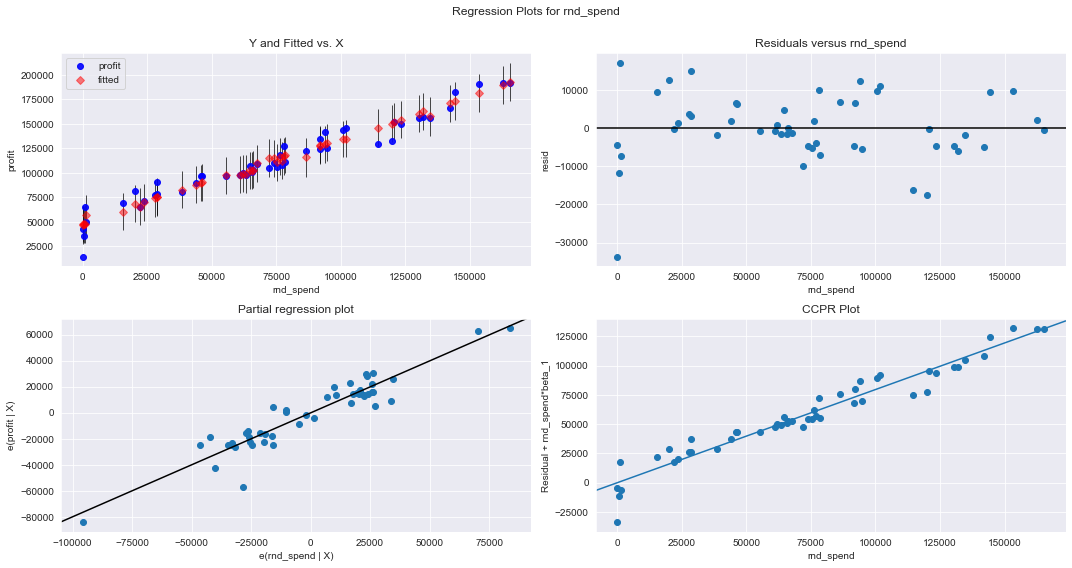

In [52]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1, 'rnd_spend', fig=fig)
plt.show

## checking the cooks distance using stem plot

In [53]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

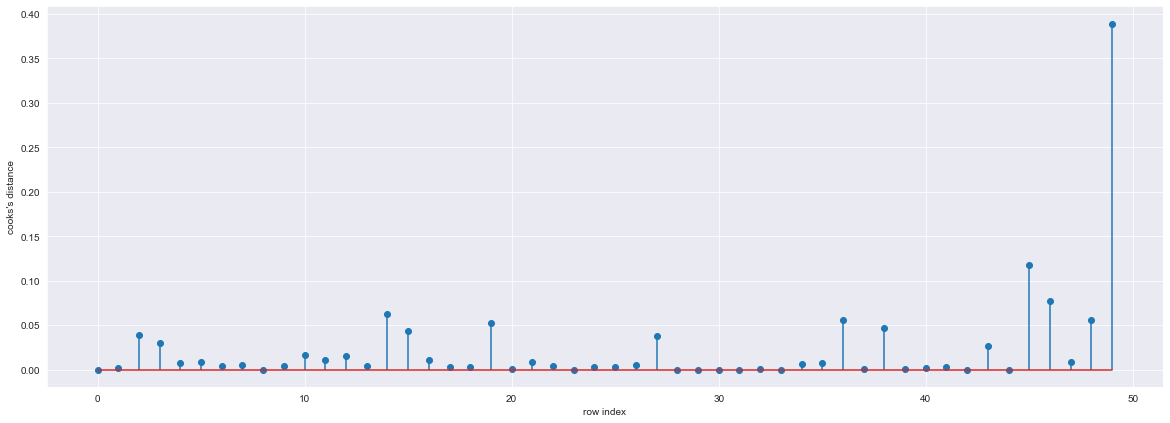

In [54]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data_cl1)), np.round(c,3))
plt.xlabel('row index')
plt.ylabel("cooks's distance")
plt.show()

In [57]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.3894886227924922)

### cheching the high influence points using the bubble plot

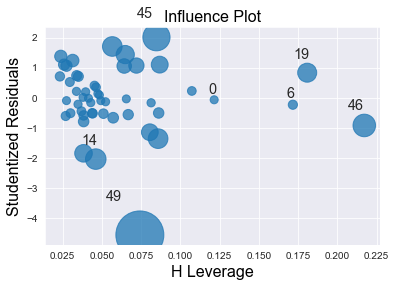

In [58]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [61]:
# we can remove the 49th row as we have enough evident of having cooks distance more than 0.5
data_cl2=data_cl1.drop(data_cl1.index[49], axis=0).reset_index()
data_cl2.shape

(49, 5)

# rebuilding the model

In [62]:
model2=smf.ols('profit~market_spend+rnd_spend', data=data_cl2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           3.74e-33
Time:                        00:49:44   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
market_spend     0.0274      0.013      2.104      0.041       0.001       0.054
rnd_spend        0.7754      0.035     22.136      0.000       0.705       0.846
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## as we can see that we have reached a pretty good r squred value we can declare model2 as the final model 

#  model prediction

In [73]:
pred=model2.predict(data_cl2)
pred

0     190942.726927
1     188043.924520
2     179957.312472
3     172246.416164
4     170022.687457
5     161999.405410
6     157669.178690
7     159705.298181
8     151804.380605
9     153787.521922
10    135096.466868
11    134699.049858
12    129422.677987
13    128049.202655
14    149827.450777
15    145769.611357
16    117530.489091
17    130936.300519
18    129020.306206
19    116793.710748
20    117108.281313
21    118793.642939
22    115484.209637
23    110513.437292
24    113382.099441
25    103711.697086
26    111873.132740
27    115389.649335
28    104243.190309
29    103595.167960
30    100355.932697
31     99610.626757
32    100216.309933
33     98705.145163
34     91568.745065
35     91104.335025
36     77530.715090
37     89363.970985
38     70555.662763
39     84485.861451
40     76823.378730
41     75926.972539
42     72178.031523
43     62783.416125
44     67759.192437
45     50613.086380
46     58959.714353
47     49785.269847
48     50205.566671
dtype: float64

In [69]:
new_data=pd.DataFrame({'market_spend':65000,'rnd_spend':95000}, index=[0])
new_data

,market_spend,rnd_spend
0,65000,95000


In [71]:
#the prediction of the profit will be
model2.predict(new_data)

0    125230.695101
dtype: float64